### Thursday, May 4th, 2023
After spending the day tweaking various hyperparameters, this setup seems to give the best results (though still not quite up to the ones in the paper):

In [1]:
!sed \
    -e s/EPOCH=30/EPOCH=50/ \
    -e s/dim=64/dim=128/ \
    -e s/topk=5/topk=30/ \
    -e "s/report='best'/report='val'/" \
    /home/callistb/GDN/run.sh \
| tee /home/callistb/GDN/run_wadi.sh

gpu_n=$1
DATASET=$2

seed=5
BATCH_SIZE=32
SLIDE_WIN=5
dim=128
out_layer_num=1
SLIDE_STRIDE=1
topk=30
out_layer_inter_dim=128
val_ratio=0.2
decay=0


path_pattern="${DATASET}"
COMMENT="${DATASET}"

EPOCH=50
report='val'

if [[ "$gpu_n" == "cpu" ]]; then
    python main.py \
        -dataset $DATASET \
        -save_path_pattern $path_pattern \
        -slide_stride $SLIDE_STRIDE \
        -slide_win $SLIDE_WIN \
        -batch $BATCH_SIZE \
        -epoch $EPOCH \
        -comment $COMMENT \
        -random_seed $seed \
        -decay $decay \
        -dim $dim \
        -out_layer_num $out_layer_num \
        -out_layer_inter_dim $out_layer_inter_dim \
        -decay $decay \
        -val_ratio $val_ratio \
        -report $report \
        -topk $topk \
        -device 'cpu'
else
    CUDA_VISIBLE_DEVICES=$gpu_n  python main.py \
        -dataset $DATASET \
        -save_path_pattern $path_pattern \
        -slide_stride $SLIDE_STRIDE \
        -slide_win $SLIDE_WIN \
        -batch $B

In [2]:
!cd /home/callistb/GDN; bash run_wadi.sh 0 wadi

epoch (0 / 50) (Loss:0.01378797, ACU_loss:26.30744954)
epoch (1 / 50) (Loss:0.00619963, ACU_loss:11.82889715)
epoch (2 / 50) (Loss:0.00590365, ACU_loss:11.26415708)
epoch (3 / 50) (Loss:0.00566457, ACU_loss:10.80799861)
epoch (4 / 50) (Loss:0.00544914, ACU_loss:10.39695037)
epoch (5 / 50) (Loss:0.00524276, ACU_loss:10.00318858)
epoch (6 / 50) (Loss:0.00509187, ACU_loss:9.71529414)
epoch (7 / 50) (Loss:0.00509608, ACU_loss:9.72331393)
epoch (8 / 50) (Loss:0.00510939, ACU_loss:9.74871774)
epoch (9 / 50) (Loss:0.00510418, ACU_loss:9.73877310)
epoch (10 / 50) (Loss:0.00500515, ACU_loss:9.54982139)
epoch (11 / 50) (Loss:0.00494683, ACU_loss:9.43854581)
epoch (12 / 50) (Loss:0.00493493, ACU_loss:9.41584732)
epoch (13 / 50) (Loss:0.00493241, ACU_loss:9.41102879)
epoch (14 / 50) (Loss:0.00483406, ACU_loss:9.22338959)
epoch (15 / 50) (Loss:0.00479815, ACU_loss:9.15486210)
epoch (16 / 50) (Loss:0.00477202, ACU_loss:9.10502044)
epoch (17 / 50) (Loss:0.00485770, ACU_loss:9.26848339)
epoch (18 / 50

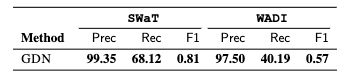

The precision has improved from yesterday (up from 0.49), but the recall is down from 0.4. I'll inspect the trained model some tomorrow and see what it's doing.